In [1]:
!git clone https://github.com/hrishavkmr/track

Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Counting objects: 100% (12163/12163), done.
remote: Compressing objects: 100% (12163/12163), done.
remote: Total 12163 (delta 0), reused 12163 (delta 0), pack-reused 0
Receiving objects: 100% (12163/12163), 156.98 MiB | 37.87 MiB/s, done.
Checking out files: 100% (12160/12160), done.


In [2]:
!ls track

driving_log.csv  IMG


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pandas as pd
import ntpath
import random
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
datadir = 'track'
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Hrishav\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.1,0.2,0.649786
1,C:\Users\Hrishav\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Hrishav\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Hrishav\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Hrishav\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Hrishav\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [5]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.1,0.2,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


(array([3.50e+01, 6.00e+00, 6.00e+00, 6.00e+00, 1.30e+01, 8.00e+00,
        2.40e+01, 2.20e+01, 5.30e+01, 1.31e+02, 9.90e+01, 1.58e+02,
        2.99e+03, 1.37e+02, 8.60e+01, 1.26e+02, 5.40e+01, 2.20e+01,
        1.90e+01, 2.00e+00, 9.00e+00, 4.00e+00, 4.00e+00, 6.00e+00,
        3.30e+01]),
 array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
        -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
         0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ]),
 <a list of 25 Patch objects>)

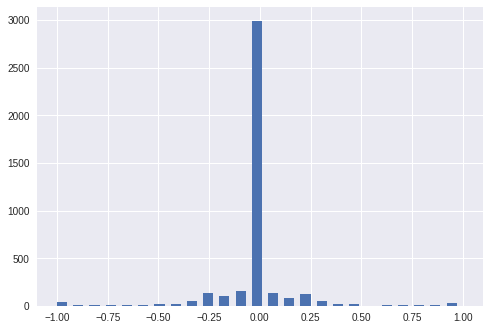

In [6]:
#which steering angles are more frequent
num_bins = 25
hist_, bins = np.histogram(data['steering'], num_bins)
plt.hist(data['steering'],bins,width = 0.05)
# plt.show()

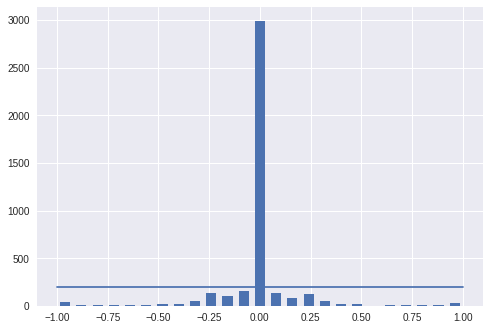

In [7]:
#as can be seen the model will become biased towards 0 angle,so we reject all samples above certain threshold value

# print(bins)
center = (bins[:-1] + bins[1:]) *0.5 
plt.bar(center,hist_,width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (200,200)) # restricting values to 200

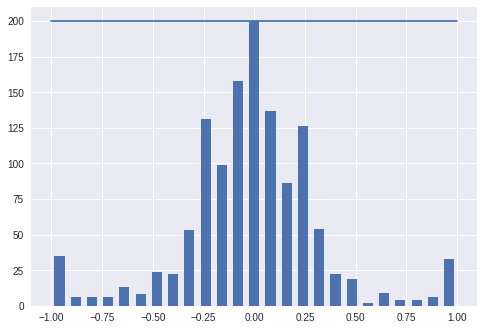

In [8]:
remove_list = []
for i in range(num_bins):
  li = []
  for j in range(len(data['steering'])):
    if(data['steering'][j] >= bins[i] and  data['steering'][j] <= bins[i+1]):
      li.append(j)
      
  li = shuffle(li)
  li = li[200:]
  remove_list.extend(li)
  
  
data.drop(data.index[remove_list],inplace = True)
hist_, bins = np.histogram(data['steering'], num_bins)
# print(bins)
center = (bins[:-1] + bins[1:]) *0.5 
plt.bar(center,hist_,width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (200,200)) # restricting values to 200

In [0]:
def load_img_steering(dir,data):
  image_paths = []
  steering_angle = []
  for i in range(len(data)):
    single_data_point = data.iloc[i]
    center,left,right = single_data_point['center'],single_data_point['left'],single_data_point['right']
    image_paths.append(os.path.join(dir,center));
    steering_angle.append(single_data_point['steering'])
  image_paths = np.asarray(image_paths)
  steering_angle = np.asarray(steering_angle)
  return image_paths,steering_angle

image_paths,steering_angle = load_img_steering('track' + '/IMG',data)

In [0]:
x_train,x_val,y_train,y_val = train_test_split(image_paths,steering_angle,test_size = 0.2,random_state = 6)

In [11]:
print("Training_samples: ", len(x_train))
print("Validating_samples: ", len(x_val))

Training_samples:  1010
Validating_samples:  253


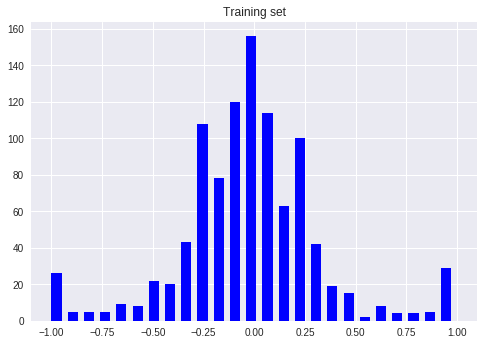

In [12]:
plt.hist(y_train,bins,width = 0.05, color = 'blue')
plt.title('Training set')
plt.show()

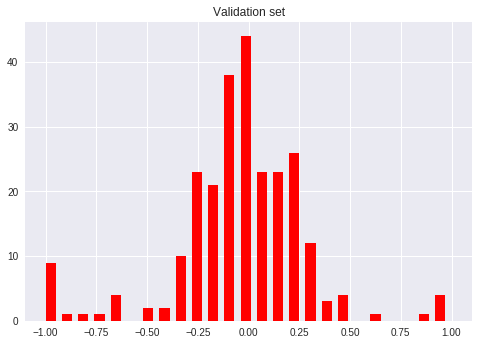

In [13]:
plt.hist(y_val,bins,width = 0.05,color = 'red')
plt.title('Validation set')
plt.show()

In [0]:
#we convert RGB to YUV format (from nvidia research paper)
def image_preprocess(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:] #1 preprocessing
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) #2 preprocessing
  img = cv2.GaussianBlur(img, (3,3), 0) #3 preprocessing
  img = cv2.resize(img, (200,66)) #architecture
  img = img/255 #normalizing image
  return img

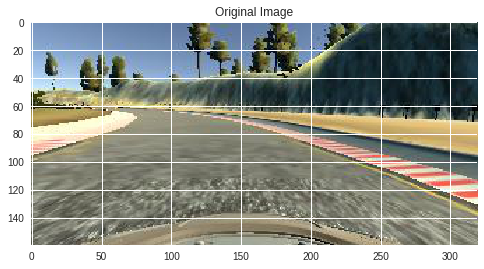

In [15]:
image_path = image_paths[0]
original_image = mpimg.imread(image_path)
modified_image = image_preprocess(image_path)

plt.imshow(original_image)
plt.title('Original Image')
plt.show()

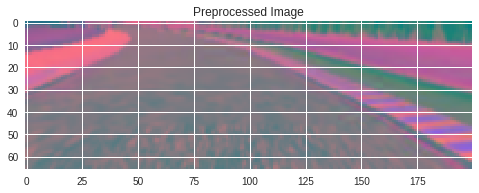

In [16]:
plt.imshow(modified_image)
plt.title('Preprocessed Image')
plt.show()

In [17]:
modified_image.shape

(66, 200, 3)

In [0]:
x_train = np.array(list(map(image_preprocess,x_train)))
x_val = np.array(list(map(image_preprocess,x_val)))

(1010, 66, 200, 3)


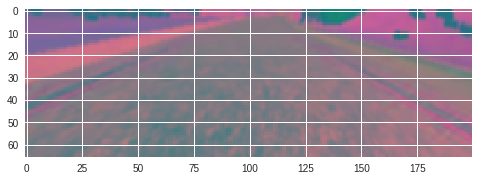

In [19]:
plt.imshow(x_train[random.randint(0,len(x_train)-1)])
print(x_train.shape)

In [0]:
def get_model():
  model = Sequential()
  model.add(Conv2D(24, (5,5) ,strides = (2,2) ,input_shape = (66,200,3), activation = 'elu'))
  model.add(Conv2D(36, (5,5) ,strides = (2,2) , activation = 'elu'))
  model.add(Conv2D(48, (5,5) ,strides = (2,2) , activation = 'elu'))
  model.add(Conv2D(64, (3,3) , activation = 'elu'))
  model.add(Conv2D(64, (3,3) , activation = 'elu'))
  model.add(Dropout(0.5)) 
  model.add(Flatten())
  model.add(Dense(100,activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(50,activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  
  model.compile(loss = 'mse', optimizer = Adam(lr = 0.001))
#   print(model.summary)
  return model
  

In [21]:
model = get_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_1 (Dropout)  

In [22]:
history = model.fit(x_train,y_train,epochs = 30, validation_data = (x_val,y_val), batch_size = 100, verbose=1, shuffle = 1)

Instructions for updating:
Use tf.cast instead.
Train on 1010 samples, validate on 253 samples
Epoch 1/30
1010/1010 [==============================] - 11s 10ms/step - loss: 0.7206 - val_loss: 0.0953
Epoch 2/30
1010/1010 [==============================] - 9s 9ms/step - loss: 0.2339 - val_loss: 0.1163
Epoch 3/30
1010/1010 [==============================] - 9s 9ms/step - loss: 0.1648 - val_loss: 0.0941
Epoch 4/30
1010/1010 [==============================] - 9s 9ms/step - loss: 0.1441 - val_loss: 0.0890
Epoch 5/30
1010/1010 [==============================] - 9s 9ms/step - loss: 0.1340 - val_loss: 0.0904
Epoch 6/30
1010/1010 [==============================] - 9s 9ms/step - loss: 0.1307 - val_loss: 0.0801
Epoch 7/30
1010/1010 [==============================] - 9s 9ms/step - loss: 0.1287 - val_loss: 0.0727
Epoch 8/30
1010/1010 [==============================] - 9s 9ms/step - loss: 0.1094 - val_loss: 0.0722
Epoch 9/30
1010/1010 [==============================] - 9s 9ms/step - loss: 0.1075 - va

Text(0.5, 0, 'Epoch')

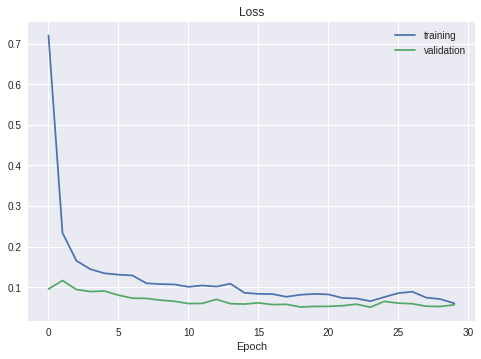

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [0]:
model.save('model.h5')